In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
from chart_studio.plotly import plot, iplot

In [57]:
df = pd.read_excel('flight_data.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Automated Exploratory data analysis

In [5]:
import pandas_profiling as pf
pf.ProfileReport(df)

In [3]:
df[df.isna().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [58]:
# Since, there are only 2 missing values that too in the same row,I am droping the rows with NA values
df.dropna(how='any',inplace=True)
df.shape

(10682, 11)

In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [7]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers Premium economy'),
  Text(3, 0, 'Multiple carriers'),
  Text(4, 0, 'Air India'),
  Text(5, 0, 'Vistara Premium economy'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'GoAir'),
  Text(8, 0, 'IndiGo'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'SpiceJet'),
  Text(11, 0, 'Trujet')])

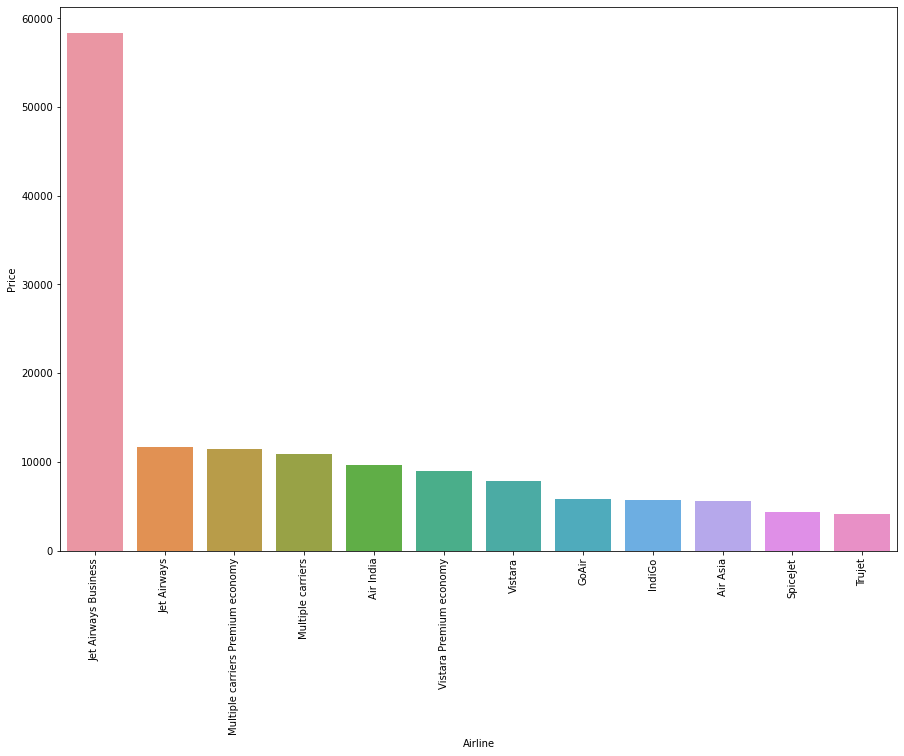

In [8]:
# checking relation between Airline and Price 
plt.figure(figsize=(15,10))
Price=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=Price.index,y=Price.values)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)

In [9]:
df.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

##### Jet Airways Business prices is highest and Trujet Prices are lowest

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

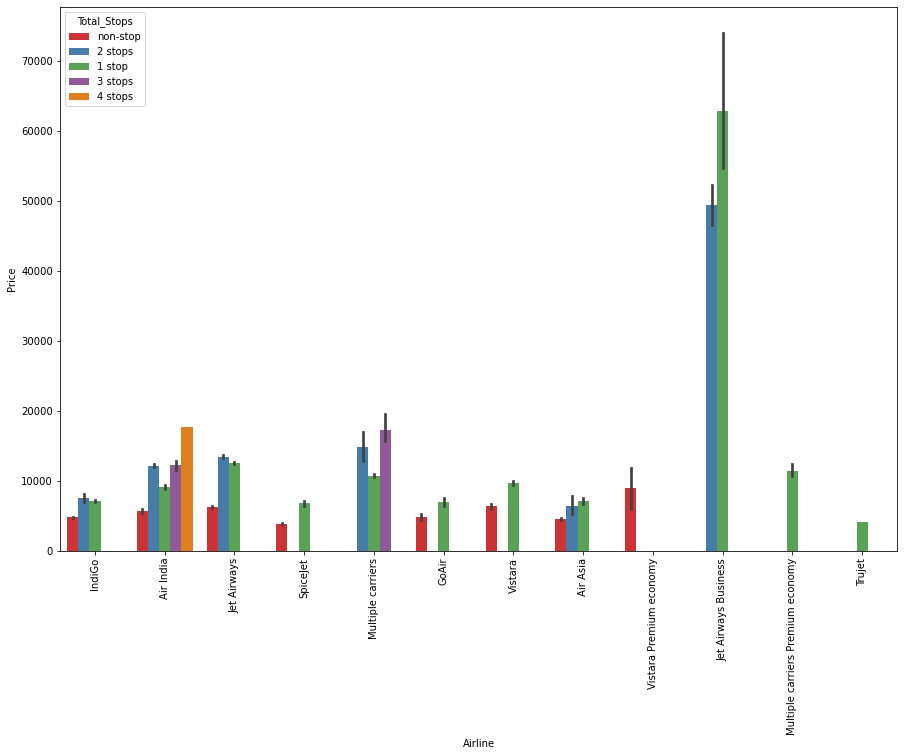

In [10]:
# comparing price of ariline with respect to number of stops
df.groupby(['Airline','Total_Stops'])['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x=df.Airline,y=df.Price,hue=df['Total_Stops'],palette='Set1')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

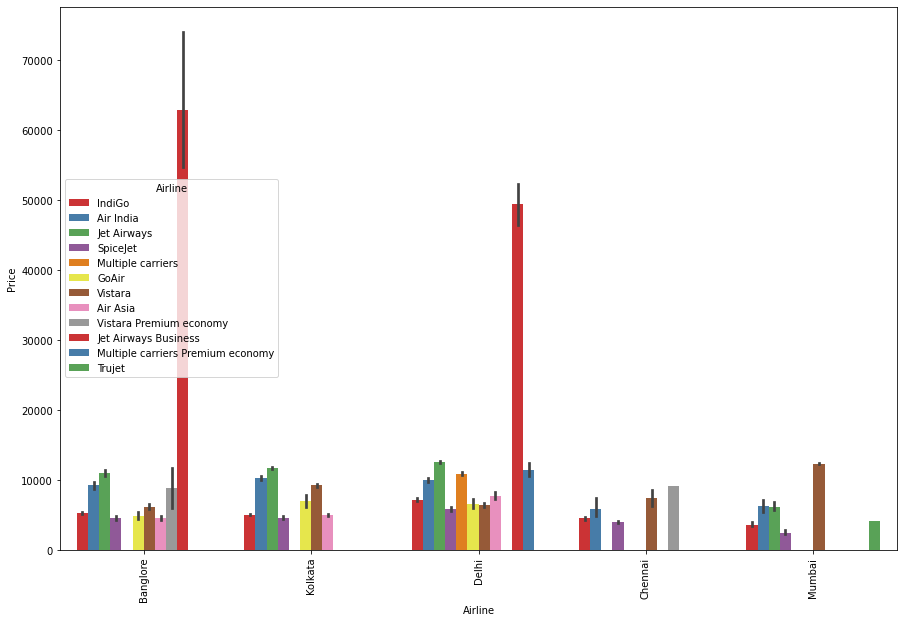

In [11]:
# comparing price with respect to source
plt.figure(figsize=(15,10))
sns.barplot(x=df.Source,y=df.Price,hue=df['Airline'],palette='Set1')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

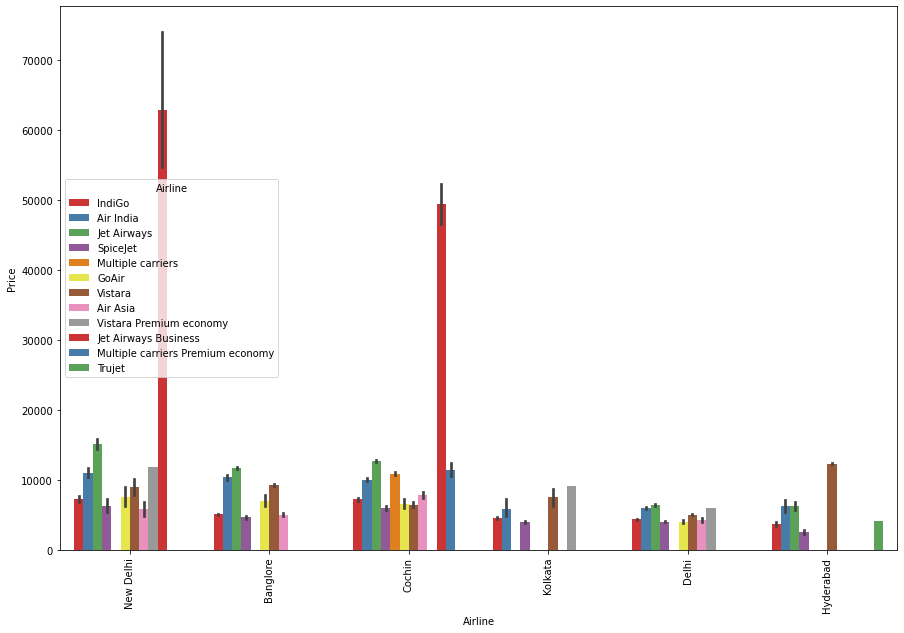

In [12]:
# comparing price with respect to destination
plt.figure(figsize=(15,10))
sns.barplot(x=df.Destination,y=df.Price,hue=df['Airline'],palette='Set1')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)

In [59]:
##### New Delhi and Delhi are represented by different category, let's merge it
df['Destination'].replace('New Delhi','Delhi', inplace = True)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Hyderabad')])

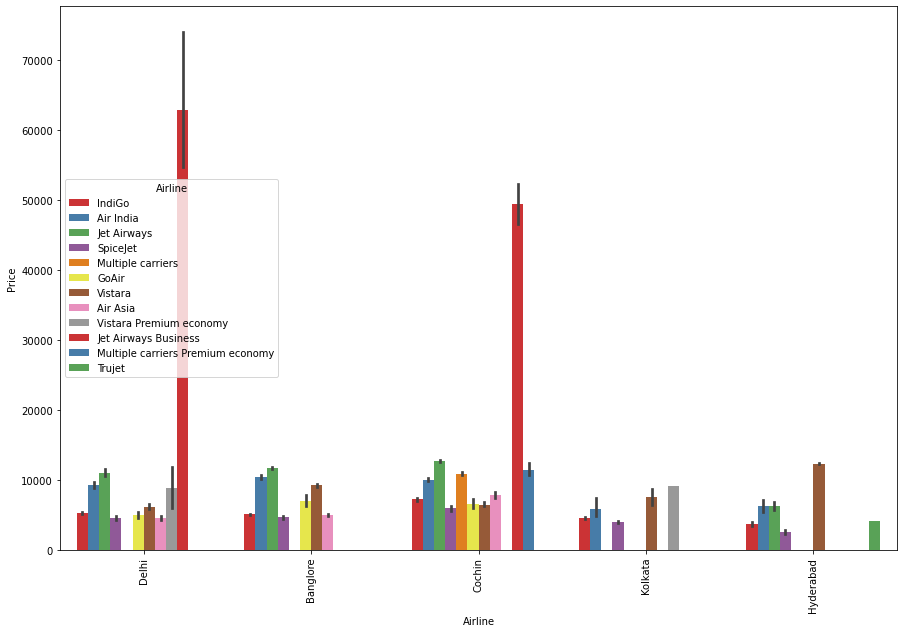

In [14]:
plt.figure(figsize=(15,10))
sns.barplot(x=df.Destination,y=df.Price,hue=df['Airline'],palette='Set1')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)

## Feature engineering

In [60]:
# converting column 'Date_of_Journey' from categorical to datetime dtype
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y")
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [61]:
# since all data is from same year, I am just extracting day and month from "Date_of_journey"
df['Day_of_Journey']=(df['Date_of_Journey']).dt.day
df['Month_of_Journey']=(df['Date_of_Journey']).dt.month

In [62]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [63]:
df.drop('Date_of_Journey',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [64]:
# Extracting Hours and minutes form "Dep_Time" column
df['Dep_Time']=pd.to_datetime(df['Dep_Time'],format="%H:%M")
df['Dep_Hour']=(df['Dep_Time']).dt.hour
df['Dep_Minute']=(df['Dep_Time']).dt.minute
df.drop('Dep_Time',axis=1,inplace=True)

In [65]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [66]:
# Extracting hour and minute from Arrival Time
df['Arrival_Hour']=(pd.to_datetime(df['Arrival_Time'])).dt.hour
df['Arrival_Minute']=(pd.to_datetime(df['Arrival_Time'])).dt.minute
df.drop('Arrival_Time',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [67]:
# Extracting hour and minute from Duration
duration = df.Duration.str.split(' ',expand = True).fillna('00m')
df['Duration_hours']=duration[0].apply(lambda x: x[:-1])
df['Duration_minutes']=duration[1].apply(lambda x: x[:-1])
df.drop('Duration',axis=1,inplace=True)
df.head()



,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [68]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [69]:
# Applying encoding on categorical data
dict={'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4}
df['Total_Stops']=df['Total_Stops'].map(dict)
df['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [70]:
Airlines = pd.get_dummies(df['Airline'],drop_first=True)
Airlines

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [71]:
places = pd.get_dummies(df[['Source','Destination']],drop_first=True)
places

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0
2,0,1,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
10678,0,0,1,0,0,0,0,0
10679,0,0,1,0,0,0,0,0
10680,0,0,0,0,0,1,0,0
10681,0,0,0,0,0,1,0,0


In [72]:
df=pd.concat([Airlines,places,df],axis=1)
df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_minutes
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,9,6,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,1,3,16,50,21,35,4,45


In [73]:
pd.pandas.set_option('display.max_columns',None)
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_minutes
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45


In [75]:
df.drop(['Route','Additional_Info'],axis=1,inplace=True)
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_minutes
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,13882,9,6,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,13302,1,3,16,50,21,35,4,45


In [76]:
df.shape

(10682, 29)

<AxesSubplot:>

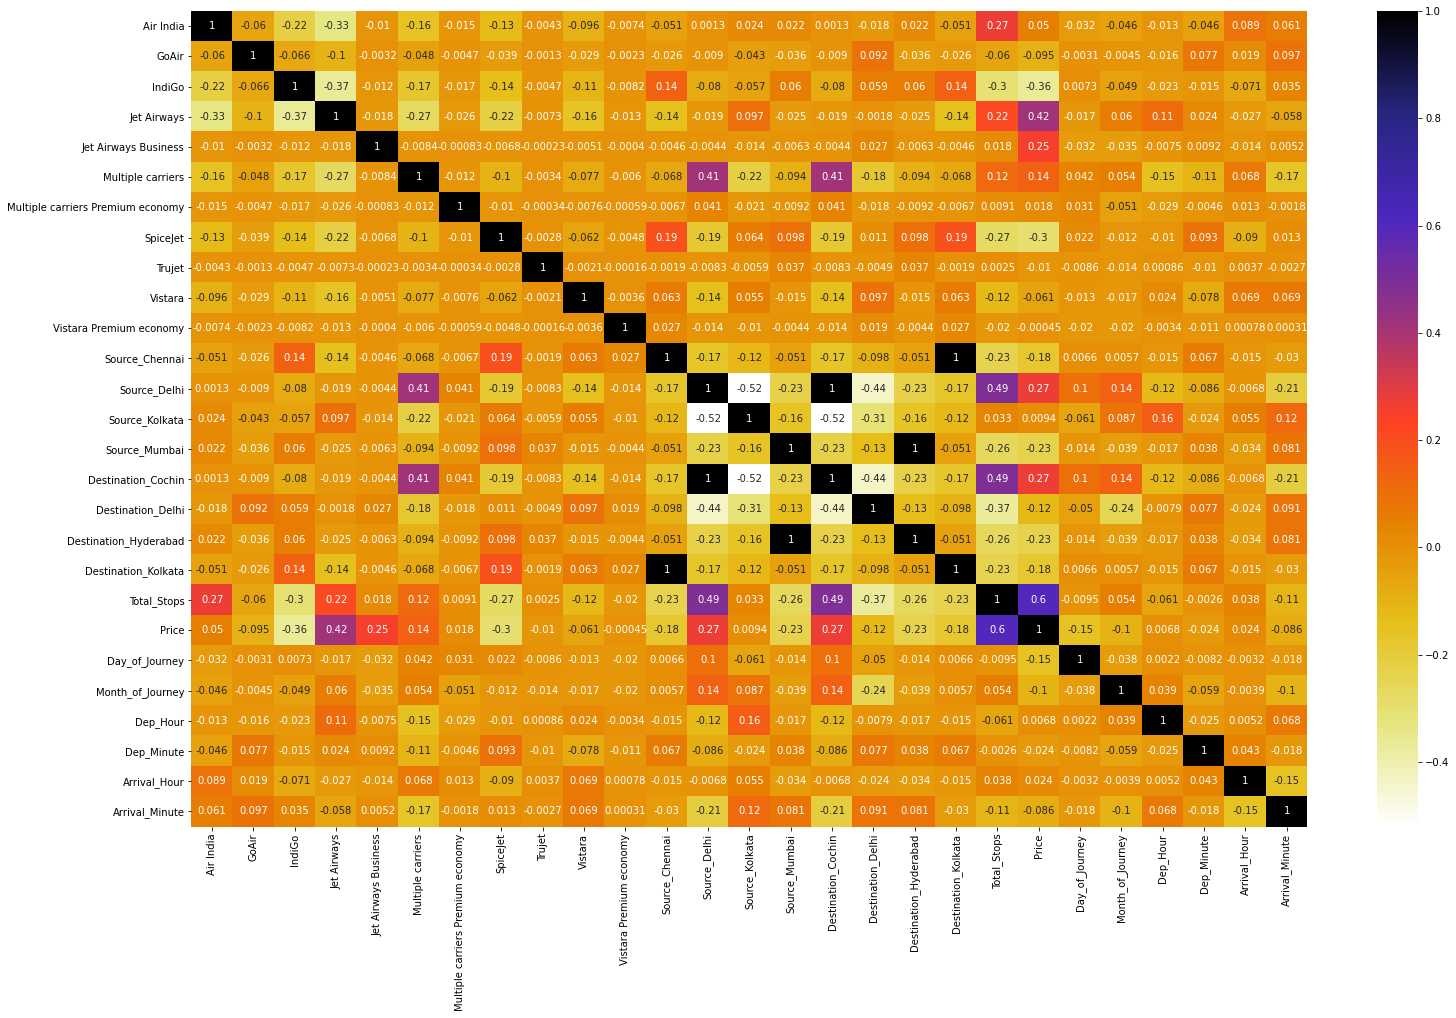

In [83]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.CMRmap_r)

In [80]:
# Splitting data into train and test
X= df.drop('Price',axis=1)
Y = df.Price

In [182]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

## Model Building

In [183]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(model):
    print('Model: {}'.format(model))
    Reg= model.fit(X_train,Y_train)
    print("\t\tTraining r2_score: {}".format(np.round(Reg.score(X_train,Y_train)),3))
    y_pred = Reg.predict(X_test)
    R2_score=r2_score(Y_test,y_pred) 
    print("\t\tPrediction r2_score: {}".format(np.round(R2_score,3)))
    MAE = np.round(mean_absolute_error(Y_test,y_pred),3)
    MSE = np.round(mean_squared_error(Y_test,y_pred),3)
    print('\t\tMAE:{}'. format(MAE))
    print('\t\tMSE:{}'.format(MSE))
    print('\t\tRMSE:{}'.format(np.round(np.sqrt(MSE),3))) 

In [222]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [223]:
X_train[['Duration_hours','Duration_minutes']]=X_train[['Duration_hours','Duration_minutes']].astype(int)
X_test[['Duration_hours','Duration_minutes']]=X_test[['Duration_hours','Duration_minutes']].astype(int)

In [254]:
predict(LinearRegression())
predict(Ridge())
predict(Lasso())
predict(ExtraTreesRegressor(n_estimators=120))
predict(RandomForestRegressor())
predict(LGBMRegressor())
predict(XGBRegressor())
predict(CatBoostRegressor(iterations=1000,
                          learning_rate=0.05718,
                          depth=8))

Model: LinearRegression()
		Training r2_score: 1.0
		Prediction r2_score: 0.6
		MAE:1995.507
		MSE:8624531.306
		RMSE:2936.755
Model: Ridge()
		Training r2_score: 1.0
		Prediction r2_score: 0.599
		MAE:2001.359
		MSE:8656802.903
		RMSE:2942.245
Model: Lasso()
		Training r2_score: 1.0
		Prediction r2_score: 0.599
		MAE:1997.585
		MSE:8640081.265
		RMSE:2939.402
Model: ExtraTreesRegressor(n_estimators=120)
		Training r2_score: 1.0
		Prediction r2_score: 0.806
		MAE:1225.559
		MSE:4192708.204
		RMSE:2047.61
Model: RandomForestRegressor()
		Training r2_score: 1.0
		Prediction r2_score: 0.794
		MAE:1182.154
		MSE:4451457.53
		RMSE:2109.848
Model: LGBMRegressor()
		Training r2_score: 1.0
		Prediction r2_score: 0.823
		MAE:1247.141
		MSE:3823589.592
		RMSE:1955.4
Model: XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
       

C:\Users\reena\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\reena\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



		Training r2_score: 1.0
		Prediction r2_score: 0.844
		MAE:1140.601
		MSE:3364912.191
		RMSE:1834.37
Model: <catboost.core.CatBoostRegressor object at 0x0000024572CC80A0>
0:	learn: 4464.3791193	total: 12ms	remaining: 12s
1:	learn: 4304.6049056	total: 15.2ms	remaining: 7.59s
2:	learn: 4156.6246026	total: 18.1ms	remaining: 6s
3:	learn: 4024.0539312	total: 20.9ms	remaining: 5.2s
4:	learn: 3917.1191834	total: 23.9ms	remaining: 4.76s
5:	learn: 3788.2784613	total: 26.8ms	remaining: 4.43s
6:	learn: 3671.7209286	total: 29.8ms	remaining: 4.23s
7:	learn: 3566.9671643	total: 32.7ms	remaining: 4.05s
8:	learn: 3456.5804516	total: 35.4ms	remaining: 3.9s
9:	learn: 3366.9802173	total: 38.2ms	remaining: 3.78s
10:	learn: 3281.6037037	total: 41.1ms	remaining: 3.69s
11:	learn: 3201.0283030	total: 44ms	remaining: 3.62s
12:	learn: 3131.2486858	total: 46.9ms	remaining: 3.56s
13:	learn: 3072.5671180	total: 49.9ms	remaining: 3.51s
14:	learn: 3018.8817831	total: 52.8ms	remaining: 3.47s
15:	learn: 2963.1505180	

155:	learn: 1775.2436357	total: 466ms	remaining: 2.52s
156:	learn: 1772.8616296	total: 469ms	remaining: 2.52s
157:	learn: 1771.5219713	total: 472ms	remaining: 2.52s
158:	learn: 1767.6966649	total: 475ms	remaining: 2.51s
159:	learn: 1765.9703972	total: 478ms	remaining: 2.51s
160:	learn: 1762.9151716	total: 481ms	remaining: 2.51s
161:	learn: 1760.7536430	total: 486ms	remaining: 2.51s
162:	learn: 1757.8171391	total: 490ms	remaining: 2.52s
163:	learn: 1755.3698215	total: 493ms	remaining: 2.52s
164:	learn: 1751.5363404	total: 497ms	remaining: 2.52s
165:	learn: 1747.7338531	total: 502ms	remaining: 2.52s
166:	learn: 1746.1182619	total: 507ms	remaining: 2.53s
167:	learn: 1745.2440270	total: 510ms	remaining: 2.52s
168:	learn: 1743.7059785	total: 513ms	remaining: 2.52s
169:	learn: 1742.8544008	total: 518ms	remaining: 2.53s
170:	learn: 1739.9525280	total: 522ms	remaining: 2.53s
171:	learn: 1737.4486577	total: 525ms	remaining: 2.53s
172:	learn: 1736.3546519	total: 530ms	remaining: 2.53s
173:	learn

352:	learn: 1486.3233382	total: 1.11s	remaining: 2.04s
353:	learn: 1484.8290930	total: 1.11s	remaining: 2.03s
354:	learn: 1483.8055361	total: 1.12s	remaining: 2.03s
355:	learn: 1482.7144272	total: 1.12s	remaining: 2.02s
356:	learn: 1481.6158685	total: 1.12s	remaining: 2.02s
357:	learn: 1480.4305407	total: 1.13s	remaining: 2.02s
358:	learn: 1479.7044286	total: 1.13s	remaining: 2.02s
359:	learn: 1478.4320568	total: 1.13s	remaining: 2.01s
360:	learn: 1477.1413202	total: 1.14s	remaining: 2.01s
361:	learn: 1474.5690571	total: 1.14s	remaining: 2.01s
362:	learn: 1474.2932829	total: 1.14s	remaining: 2s
363:	learn: 1472.9568926	total: 1.15s	remaining: 2s
364:	learn: 1471.3351990	total: 1.15s	remaining: 2s
365:	learn: 1470.2637648	total: 1.15s	remaining: 1.99s
366:	learn: 1469.3733668	total: 1.15s	remaining: 1.99s
367:	learn: 1469.2132239	total: 1.16s	remaining: 1.99s
368:	learn: 1469.1022926	total: 1.16s	remaining: 1.98s
369:	learn: 1468.2942911	total: 1.16s	remaining: 1.98s
370:	learn: 1465.95

529:	learn: 1335.6388175	total: 1.61s	remaining: 1.43s
530:	learn: 1334.9221820	total: 1.61s	remaining: 1.43s
531:	learn: 1334.1721233	total: 1.62s	remaining: 1.42s
532:	learn: 1333.1215818	total: 1.62s	remaining: 1.42s
533:	learn: 1331.9447583	total: 1.62s	remaining: 1.42s
534:	learn: 1331.0096999	total: 1.63s	remaining: 1.42s
535:	learn: 1329.9937256	total: 1.63s	remaining: 1.41s
536:	learn: 1328.6729186	total: 1.64s	remaining: 1.41s
537:	learn: 1328.1733857	total: 1.64s	remaining: 1.41s
538:	learn: 1327.0304858	total: 1.64s	remaining: 1.4s
539:	learn: 1326.3862831	total: 1.64s	remaining: 1.4s
540:	learn: 1325.3661963	total: 1.65s	remaining: 1.4s
541:	learn: 1324.6145033	total: 1.65s	remaining: 1.4s
542:	learn: 1323.6595066	total: 1.65s	remaining: 1.39s
543:	learn: 1322.6050738	total: 1.66s	remaining: 1.39s
544:	learn: 1321.9651288	total: 1.66s	remaining: 1.39s
545:	learn: 1321.6110366	total: 1.66s	remaining: 1.38s
546:	learn: 1320.7716762	total: 1.67s	remaining: 1.38s
547:	learn: 13

702:	learn: 1235.5506131	total: 2.11s	remaining: 891ms
703:	learn: 1235.1631619	total: 2.11s	remaining: 888ms
704:	learn: 1234.9760731	total: 2.11s	remaining: 885ms
705:	learn: 1234.3975048	total: 2.12s	remaining: 882ms
706:	learn: 1234.0263083	total: 2.12s	remaining: 879ms
707:	learn: 1233.5832570	total: 2.12s	remaining: 876ms
708:	learn: 1232.9989557	total: 2.13s	remaining: 873ms
709:	learn: 1232.4230383	total: 2.13s	remaining: 871ms
710:	learn: 1232.4084287	total: 2.13s	remaining: 867ms
711:	learn: 1232.1311644	total: 2.14s	remaining: 864ms
712:	learn: 1231.4741222	total: 2.14s	remaining: 861ms
713:	learn: 1231.2703079	total: 2.14s	remaining: 858ms
714:	learn: 1231.2366320	total: 2.15s	remaining: 855ms
715:	learn: 1230.8570359	total: 2.15s	remaining: 853ms
716:	learn: 1230.4744701	total: 2.15s	remaining: 849ms
717:	learn: 1230.0309340	total: 2.15s	remaining: 846ms
718:	learn: 1229.3986866	total: 2.16s	remaining: 843ms
719:	learn: 1229.3549998	total: 2.16s	remaining: 840ms
720:	learn

875:	learn: 1167.3049188	total: 2.61s	remaining: 369ms
876:	learn: 1166.8202277	total: 2.61s	remaining: 366ms
877:	learn: 1166.6519367	total: 2.61s	remaining: 363ms
878:	learn: 1166.3986282	total: 2.62s	remaining: 360ms
879:	learn: 1166.0300603	total: 2.62s	remaining: 357ms
880:	learn: 1165.6664804	total: 2.62s	remaining: 354ms
881:	learn: 1165.4157704	total: 2.63s	remaining: 351ms
882:	learn: 1164.9495920	total: 2.63s	remaining: 348ms
883:	learn: 1164.5825439	total: 2.63s	remaining: 345ms
884:	learn: 1164.4228731	total: 2.64s	remaining: 343ms
885:	learn: 1164.3654153	total: 2.64s	remaining: 340ms
886:	learn: 1164.3246349	total: 2.64s	remaining: 336ms
887:	learn: 1163.8318583	total: 2.64s	remaining: 333ms
888:	learn: 1163.4727703	total: 2.65s	remaining: 330ms
889:	learn: 1163.3746372	total: 2.65s	remaining: 328ms
890:	learn: 1163.0676455	total: 2.65s	remaining: 325ms
891:	learn: 1162.6984714	total: 2.65s	remaining: 322ms
892:	learn: 1162.6328728	total: 2.66s	remaining: 319ms
893:	learn